For this question we used Newton's equations:
$$ \dot{\mathbf{r}} = \mathbf{v} $$
$$ \dot{\mathbf{v}} = \frac{\mathbf{F}(\mathbf{r})}{m} = \mathbf{a} $$

coupled with Verlet algorithm:
$$ \mathbf{r}_{k+1} = \mathbf{r}_{k} + \mathbf{v}_{k}dt + \frac{1}{2}\mathbf{a}_kdt^2 $$

$$ \mathbf{a}_{k+1} = \frac{\mathbf{F}(\mathbf{r}_{k+1})}{m}. $$

From there we simply chose a length of time t and plotted the graph of the orbit.

In [1]:
G=6.67408e-11
mass_sun=1.989e30
R=149.59787e9


ax_initial=-(G*mass_sun)/R**2
ay_initial=0
ax_initial

-0.005931648003795993

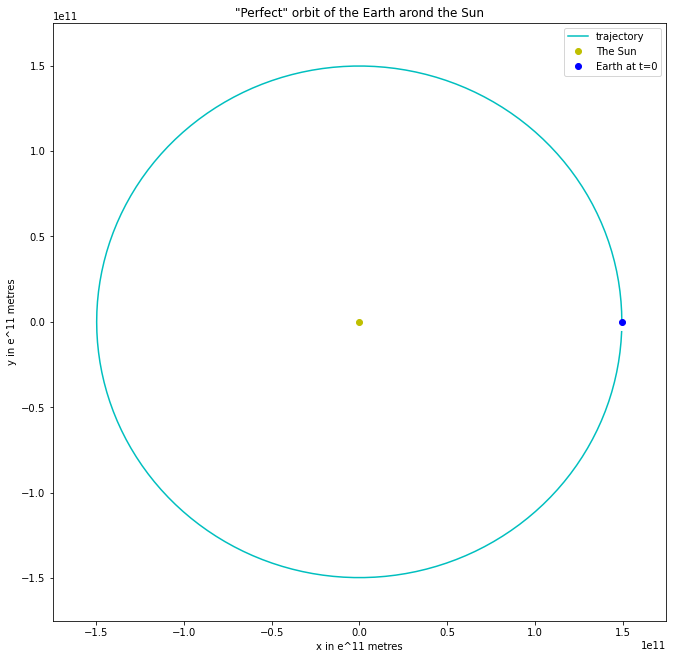

In [11]:
import numpy as np
import matplotlib.pyplot as plt

G=6.67408e-11
mass_sun=1.989e30
R=149.59787e9


tmax=3.154e7
dt=100000
N = int(tmax/dt)


t = np.zeros((N,))
r = np.zeros((2,N))
v = np.zeros((2,N))
a = np.zeros((2,N))

r[0,0]=R

r[1,0]=0
v[0,0]=0
v[1,0]=29800

a[0,0]=-(G*mass_sun)/R**2
a[1,0]=0

for n in range(0,N-1):
    t[n+1] = t[n] + dt
    r[:,n+1]=r[:,n] + ( v[:,n]*(dt)) + (0.5*(a[:,n])* ((dt)**2))
    a[:,n+1]=((-1*G*mass_sun)/(np.sqrt((r[0,n+1])**2+(r[1,n+1])**2)**3)*r[:,n+1])
    v[:,n+1]=v[:,n]+0.5*(a[:,n+1]+a[:,n])*(dt)
    
plt.figure(figsize=(11,11))

plt.plot(r[0,:],r[1,:],'c',label='trajectory')

plt.plot(0,'yo',lw=2,label='The Sun')
plt.plot(R,0,'bo',lw=2,label='Earth at t=0')

plt.xlabel('x in e^11 metres')
plt.ylabel('y in e^11 metres')
plt.legend()
plt.title('"Perfect" orbit of the Earth arond the Sun')
plt.xlim(-175e9,175e9)
plt.ylim(-175e9,175e9)
plt.show()



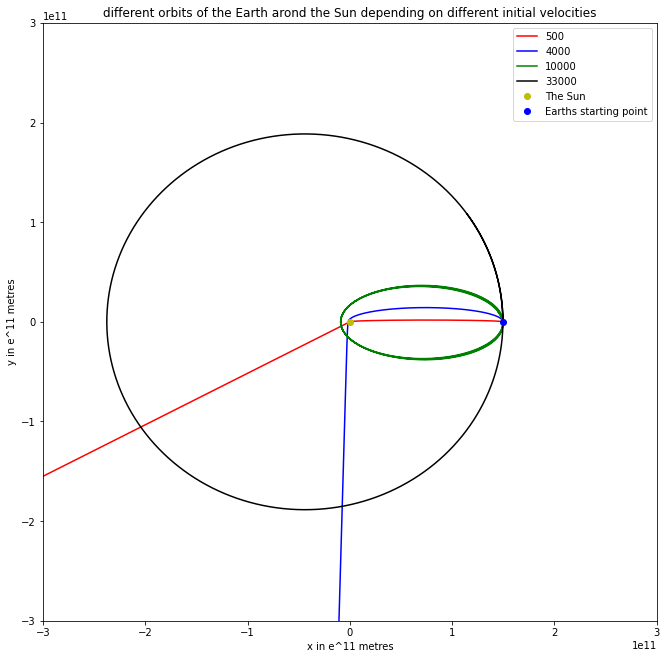

In [2]:
G=6.67408e-11
mass_sun=1.989e30
R=149.59787e9

tmax=5e7
dt=10000

N = int(tmax/dt)
t = np.zeros((N,))
r = np.zeros((2,N))
v = np.zeros((2,N))
a = np.zeros((2,N))

r[0,0]=R

r[1,0]=0
v[0,0]=0

a[0,0]=-(G*mass_sun)/R**2
a[1,0]=0

varied_v=[500,4000,10000,33000]
plotcols = ['r','b','g','k']
plt.figure(figsize=(11,11))
for k in range(len(varied_v)):
    v[1,0]=varied_v[k]
    
    for n in range(0,N-1):
        t[n+1] = t[n] + dt
        r[:,n+1]=r[:,n] + ( v[:,n]*(dt)) + (0.5*(a[:,n])* ((dt)**2))
        a[:,n+1]=( (-1*G*mass_sun) / (np.sqrt((r[0,n+1])**2+(r[1,n+1])**2)**3) * r[:,n+1])
        v[:,n+1]=v[:,n]+0.5*(a[:,n+1]+a[:,n])*(dt)
    
    plt.plot(r[0,:],r[1,:],'-',color=plotcols[k],label=str(varied_v[k]))
    
plt.plot(0,'yo',lw=2,label='The Sun')
plt.plot(R,0,'bo',lw=2,label='Earths starting point')
plt.xlabel('x in e^11 metres')
plt.ylabel('y in e^11 metres')
plt.legend()
plt.title('different orbits of the Earth arond the Sun depending on different initial velocities')
plt.xlim(-300e9,300e9)
plt.ylim(-300e9,300e9)
plt.show()
